In [1]:
#Code for 2 line graphs, days on market & (list price/close price) ratio

In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import stats
import numpy as np

#Set path for CSV file
house_data_path = "Resources/cleaned_mls_data.csv"

# Read CSV file
house_data = pd.read_csv(house_data_path)

# Define Df
house_data_df = house_data

house_data_df.pop('Status')
house_data_df.pop('Address')
house_data_df.pop('City')
house_data_df.pop('Zip Code')
house_data_df.pop('Original List Price')
house_data_df.pop('SqFt Total')
house_data_df.pop('RATIO Current Price By SQFT')
house_data_df.pop('Number Of Stories')
house_data_df.pop('Beds Total')
house_data_df.pop('Parking Spaces Garage')
house_data_df.pop('Baths Total')
house_data_df.pop('Pool')
house_data_df.pop('Status Change Timestamp')
house_data_df.pop('Buyers/SubAgent Full Name')
house_data_df.pop('Expiration Date')
house_data_df.pop('Cancelled Date')
house_data_df.pop('List Agent Full Name')
house_data_df.pop('HOA')
house_data_df.pop('MLS SubArea')
house_data_df.pop('Property Sub Type')
house_data_df.pop('Property Type')
house_data_df.pop('School District')
house_data_df.pop('Subdivision Name')

house_data_df.head()

,MLS #,List Price,Close Price,Lot Size Area,Yr Built,DOM,Listing Date,Close Date,RATIO Close Price By List Price
0,14112331,95000.0,109300.0,0.125,1984.0,5,2019-06-09,2019-06-25,1.15053
1,14075152,119000.0,111268.0,0.330,1940.0,15,2019-05-02,2019-06-04,0.93503
2,14088584,110000.0,112000.0,5.313,1983.0,8,2019-05-11,2019-05-31,1.01818
3,14086347,129900.0,120000.0,0.190,1974.0,2,2019-05-11,2019-06-21,0.92379
4,14094254,119900.0,120000.0,0.206,1972.0,4,2019-05-19,2019-06-04,1.00083


In [3]:
house_data_df["Listing Date"] = pd.to_datetime(house_data_df["Listing Date"], infer_datetime_format = True)
house_data_df["Close Date"] = pd.to_datetime(house_data_df["Close Date"], infer_datetime_format = True)

house_data_df.info() #getting column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170557 entries, 0 to 170556
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   MLS #                            170557 non-null  int64         
 1   List Price                       170557 non-null  float64       
 2   Close Price                      133245 non-null  float64       
 3   Lot Size Area                    169781 non-null  float64       
 4   Yr Built                         170552 non-null  float64       
 5   DOM                              170557 non-null  int64         
 6   Listing Date                     170557 non-null  datetime64[ns]
 7   Close Date                       133245 non-null  datetime64[ns]
 8   RATIO Close Price By List Price  133245 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 11.7 MB


In [4]:
house_data_df.dropna(axis =0, inplace = True)
house_data_df.isnull().sum() #drop null cells by row

MLS #                              0
List Price                         0
Close Price                        0
Lot Size Area                      0
Yr Built                           0
DOM                                0
Listing Date                       0
Close Date                         0
RATIO Close Price By List Price    0
dtype: int64

In [5]:
house_data_df.info() #re-check column types, change dates to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132515 entries, 0 to 167640
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   MLS #                            132515 non-null  int64         
 1   List Price                       132515 non-null  float64       
 2   Close Price                      132515 non-null  float64       
 3   Lot Size Area                    132515 non-null  float64       
 4   Yr Built                         132515 non-null  float64       
 5   DOM                              132515 non-null  int64         
 6   Listing Date                     132515 non-null  datetime64[ns]
 7   Close Date                       132515 non-null  datetime64[ns]
 8   RATIO Close Price By List Price  132515 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 10.1 MB


In [6]:
#sort by most recent listing date
house_data_df.sort_values(by = 'Listing Date', ascending = False) 

,MLS #,List Price,Close Price,Lot Size Area,Yr Built,DOM,Listing Date,Close Date,RATIO Close Price By List Price
79421,14556805,236000.0,245000.0,0.000,1980.0,1,2021-04-15,2021-04-16,1.03814
80214,14553890,260000.0,270000.0,0.193,2014.0,2,2021-04-12,2021-04-14,1.03846
79803,14553021,397500.0,407500.0,0.248,1969.0,4,2021-04-11,2021-04-15,1.02516
79396,14552285,375000.0,375000.0,0.412,1984.0,0,2021-04-09,2021-04-12,1.00000
80157,14549796,100000.0,126500.0,0.320,1955.0,4,2021-04-06,2021-04-16,1.26500
...,...,...,...,...,...,...,...,...,...
153303,12094253,140000.0,160000.0,0.166,2005.0,471,2014-02-17,2017-03-30,1.14286
12117,12090686,99900.0,99000.0,0.144,2011.0,26,2014-02-13,2016-07-22,0.99099
34795,13066541,193000.0,193000.0,0.200,2003.0,858,2013-09-21,2016-02-29,1.00000
14485,12018875,149999.0,158880.0,0.294,1962.0,199,2013-09-01,2016-07-22,1.05921


In [7]:
plt.style.use('seaborn') #create a box plot, DOM per year looking at 2016-2020, make IQR data for each year (5)

List_Date = house_data_df["Listing Date"]
Close_Price = house_data_df["Close Price"]
DOM = house_data_df["DOM"]

Yr2020_df = house_data_df.loc[house_data_df["Listing Date"] == "2020"] #Grab Df data from specific year
Yr2019_df = house_data_df.loc[house_data_df["Listing Date"] == "2019"] 
Yr2018_df = house_data_df.loc[house_data_df["Listing Date"] == "2018"] 
Yr2017_df = house_data_df.loc[house_data_df["Listing Date"] == "2017"] 
Yr2016_df = house_data_df.loc[house_data_df["Listing Date"] == "2016"] 

#Find max DOM per year
Yr2020_dom_max = Yr2020_df.groupby('MLS #').max()['DOM']
Yr2020_dom_vol = pd.DataFrame(Yr2020_dom_max)

# Merge new data to dataframe
Yr2020_merge = pd.merge(Yr2020_dom_vol, house_data_df, on=("MLS #", "DOM"),how="left")
Yr2020_merge.head()

DOM_2020 = Yr2020_merge["DOM"]

# Define quartiles, IQR, lowerq and upperq
quartiles = DOM_2020.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For 2020, please note the following:")
print(f"The upper quartile of DOM is: {upperq}.")
print(f"The lower quartile of DOM is: {lowerq}.")
print(f"The interquartile range of DOM is: {iqr}.")
print(f"The median of DOM is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For 2020, please note the following:
The upper quartile of DOM is: 28.5.
The lower quartile of DOM is: 6.5.
The interquartile range of DOM is: 22.0.
The median of DOM is: 15.0.
Values above 61.5 could be outliers.
Values below -26.5 could be outliers.


In [8]:
#Set max DOM per year
Yr2019_dom_max = Yr2019_df.groupby('MLS #').max()['DOM']
Yr2019_dom_vol = pd.DataFrame(Yr2019_dom_max)

# Merge new data to dataframe
Yr2019_merge = pd.merge(Yr2019_dom_vol, house_data_df, on=("MLS #", "DOM"),how="left")
Yr2019_merge.head()

DOM_2019 = Yr2019_merge["DOM"]

# Define quartiles, IQR, lowerq and upperq
quartiles = DOM_2019.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For 2019, please note the following:")
print(f"The upper quartile of DOM is: {upperq}.")
print(f"The lower quartile of DOM is: {lowerq}.")
print(f"The interquartile range of DOM is: {iqr}.")
print(f"The median of DOM is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For 2019, please note the following:
The upper quartile of DOM is: 44.5.
The lower quartile of DOM is: 13.75.
The interquartile range of DOM is: 30.75.
The median of DOM is: 30.5.
Values above 90.625 could be outliers.
Values below -32.375 could be outliers.


In [10]:
#Max Dom
Yr2018_dom_max = Yr2018_df.groupby('MLS #').max()['DOM']
Yr2018_dom_vol = pd.DataFrame(Yr2018_dom_max)

# Merge new data to dataframe
Yr2018_merge = pd.merge(Yr2018_dom_vol, house_data_df, on=("MLS #", "DOM"),how="left")
Yr2018_merge.head()

DOM_2018 = Yr2018_merge["DOM"]

# Define quartiles, IQR, lowerq and upperq
quartiles = DOM_2018.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For 2018, please note the following:")
print(f"The upper quartile of DOM is: {upperq}.")
print(f"The lower quartile of DOM is: {lowerq}.")
print(f"The interquartile range of DOM is: {iqr}.")
print(f"The median of DOM is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For 2018, please note the following:
The upper quartile of DOM is: 33.5.
The lower quartile of DOM is: 6.5.
The interquartile range of DOM is: 27.0.
The median of DOM is: 12.5.
Values above 74.0 could be outliers.
Values below -34.0 could be outliers.


In [11]:
Yr2017_dom_max = Yr2017_df.groupby('MLS #').max()['DOM']
Yr2017_dom_vol = pd.DataFrame(Yr2017_dom_max)

# Merge new data to dataframe
Yr2017_merge = pd.merge(Yr2017_dom_vol, house_data_df, on=("MLS #", "DOM"),how="left")
Yr2017_merge.head()

DOM_2017 = Yr2017_merge["DOM"]

# Define quartiles, IQR, lowerq and upperq
quartiles = DOM_2017.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For 2017, please note the following:")
print(f"The upper quartile of DOM is: {upperq}.")
print(f"The lower quartile of DOM is: {lowerq}.")
print(f"The interquartile range of DOM is: {iqr}.")
print(f"The median of DOM is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For 2017, please note the following:
The upper quartile of DOM is: 21.5.
The lower quartile of DOM is: 4.0.
The interquartile range of DOM is: 17.5.
The median of DOM is: 10.0.
Values above 47.75 could be outliers.
Values below -22.25 could be outliers.


In [12]:
Yr2016_dom_max = Yr2016_df.groupby('MLS #').max()['DOM']
Yr2016_dom_vol = pd.DataFrame(Yr2016_dom_max)

# Merge new data to dataframe
Yr2016_merge = pd.merge(Yr2016_dom_vol, house_data_df, on=("MLS #", "DOM"),how="left")
Yr2016_merge.head()

DOM_2016 = Yr2016_merge["DOM"]

# Define quartiles, IQR, lowerq and upperq
quartiles = DOM_2016.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For 2016, please note the following:")
print(f"The upper quartile of DOM is: {upperq}.")
print(f"The lower quartile of DOM is: {lowerq}.")
print(f"The interquartile range of DOM is: {iqr}.")
print(f"The median of DOM is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

For 2016, please note the following:
The upper quartile of DOM is: 36.5.
The lower quartile of DOM is: 12.75.
The interquartile range of DOM is: 23.75.
The median of DOM is: 22.0.
Values above 72.125 could be outliers.
Values below -22.875 could be outliers.


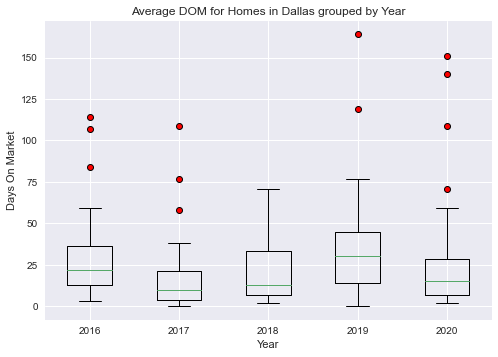

In [20]:
#Generate a box plot 
data_to_plot = [DOM_2016, DOM_2017, DOM_2018, DOM_2019, DOM_2020]

fig1, ax1 = plt.subplots()
ax1.set_title('Average DOM for Homes in Dallas grouped by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Days On Market')

outlier_dot = dict(markerfacecolor='red',markersize=6)

ax1.boxplot(data_to_plot, labels=["2016","2017","2018","2019","2020"],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()